In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import stft

Sample rate: 44100Hz


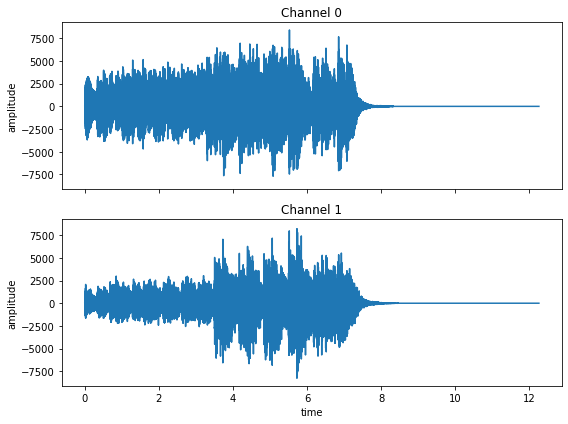

In [64]:
# Load file
fn = 'Chopin_Minute_Waltz_bars_1-10.wav'
sample_rate, data = wavfile.read(fn)

print(f"Sample rate: {sample_rate}Hz")
dur = data.shape[0] / sample_rate
t = np.linspace(0, dur, num=data.shape[0])

# Plot audio data in time domain
fig, ax = plt.subplots(2, 1, figsize=(8,6), sharex=True, sharey=True)
for i in range(data.shape[1]):
    ax[i].plot(t, data[:,i])
    ax[i].set_title(f"Channel {i}")
    ax[i].set_ylabel("amplitude")

ax[-1].set_xlabel("time [s]")
fig.tight_layout()
plt.show()


Bin width: 0.1s


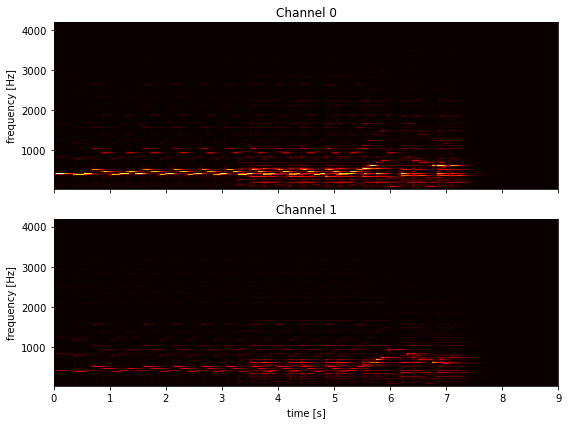

In [66]:
# Transform into frequency domain

fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharey=True, sharex=True)

bin_width = 0.1 # s
samp_per_seg = sample_rate * bin_width
print(f"Bin width: {bin_width}s")

for i in range(data.shape[1]):
    f, t, z = stft(data[:,i], fs=sample_rate, nperseg=samp_per_seg) # nperseg = sample_rate means width of 1s
    ax[i].pcolormesh(t, f, np.abs(z), cmap='hot')
    ax[i].set_ylim(27, 4186)
    ax[i].set_xlim(0, 9)
    ax[i].set_ylabel('frequency [Hz]')
    ax[i].set_title(f"Channel {i}")

ax[-1].set_xlabel('time [s]')
fig.tight_layout()
plt.show()
